<div class="alert alert-block alert-info">  
<h1><strong> > Introduction 🎯</strong></h1>

<p>
    Computer vision methods and strategies can help to recognize the fruits with some basic features like the color of fruits, intensity of fruits, shape of fruits and texture of the fruits. The term "recognize" is to predict the name of the fruit. In this project, we are going to use 141 different fruits claases.
</p>

<br>
<hr>
<b>Technical Approach:</b>
<hr>
<p> We are using python language in the implementations and Google Colab that support the machine learning and data science projects. We will use Fruits360 dataset. The dataset providers provide the training and test data separately. After training on the model, we will evaluate the model to check the performance of trained model.</p>

<br>
<hr>
<b>Source of Data: </b>
<hr>
 (<a href="https://data.mendeley.com/datasets/rp73yg93n8/1"> Fruits 360 dataset
 </a>)
   
</div>

<br>
<br>


# Updates & Connections 📆🔌

In [ ]:
# !pip install --upgrade tensorflow keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download Dataset 📥📦

In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/DATASETS/')
# !pwd
# !ls -la

In [ ]:
# !wget -O Fruits_360_dataset.zip "download-dataset-link"

In [ ]:
# !unzip Fruits_360_dataset.zip -d Fruits_360_dataset

# **>Fruits Recognition using Fruits 360 dataset<**

## Imports & Settings 📚⚙️

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input
from tensorflow.keras.layers import MaxPooling2D, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K # Ver: 1.7.0
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt # Ver: 3.3.2
from sklearn.datasets import load_files
import numpy as np # Ver: 1.18.5
import cv2
import os


In [ ]:
base_data_path = '/content/drive/MyDrive/DATASETS/Fruits_360_dataset/fruits-360'
train_img_path = os.path.join(base_data_path, 'Training')
test_img_path = os.path.join(base_data_path, 'Test')

class_name_path = '/content/class_names.txt' # for saving class_names (use in Save model part)
img_shape_path = '/content/img_shape.txt' # for saving image_shape (use in Save model part)

In [ ]:
W, H = 100, 100 # image_size
batch_size = 16
epochs_num = 35
seed = 123 # for shuffle


## data analysis🔎 📊

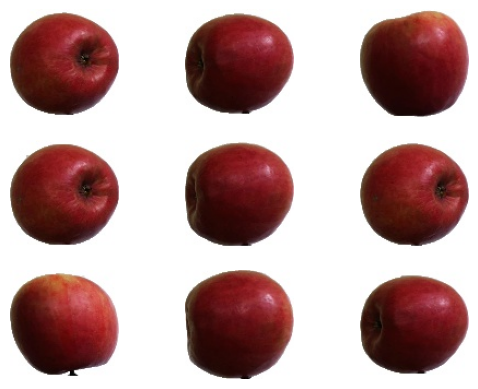

In [ ]:
samples_img_num = 9
samples_clss_num = 1
wh = int(np.sqrt(samples_img_num))

for i, clss in enumerate(os.listdir(train_img_path), 1):
    for j, file_name in enumerate(os.listdir(os.path.join(train_img_path, clss)), 1):

        img = cv2.imread(os.path.join(train_img_path, clss, file_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(wh, wh, j)
        plt.imshow(img)
        plt.axis('off')

        if j == samples_img_num:
            break

    if i == samples_clss_num:
        break


## Data Sizes 📐

In [ ]:
class_names = os.listdir(train_img_path)
class_num = len(class_names)

print("Number of Classes:", class_num)
print("Class Names:", class_names)

print("-" * 40)

train_samples_num = 0
test_samples_num = 0

for clss in os.listdir(train_img_path):
    train_samples_num += len(os.listdir(os.path.join(train_img_path, clss)))

for clss in os.listdir(test_img_path):
    test_samples_num += len(os.listdir(os.path.join(test_img_path, clss)))

print("Count of Fruits in Training set:", train_samples_num)
print("Count of Fruits in Set set:", test_samples_num)

Number of Classes: 141
Class Names: ['Apple Crimson Snow 1', 'Apple Braeburn 1', 'Apple Pink Lady 1', 'Apple Granny Smith 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apricot 1', 'Apple Red 2', 'Apple Red 1', 'Apple Red Yellow 2', 'Avocado 1', 'Apple Red 3', 'Apple Red Yellow 1', 'Apple Red Delicious 1', 'Banana Red 1', 'Blueberry 1', 'Cactus fruit 1', 'Banana Lady Finger 1', 'Cantaloupe 1', 'Banana 1', 'Beetroot 1', 'Avocado ripe 1', 'Cauliflower 1', 'Carambula 1', 'Cherry Rainier 1', 'Cherry 2', 'Cherry Wax Black 1', 'Cherry 1', 'Cantaloupe 2', 'Cherry Wax Red 1', 'Clementine 1', 'Cherry Wax Yellow 1', 'Cocos 1', 'Chestnut 1', 'Corn 1', 'Corn Husk 1', 'Cucumber Ripe 2', 'Cucumber Ripe 1', 'Dates 1', 'Granadilla 1', 'Fig 1', 'Ginger Root 1', 'Eggplant 1', 'Grapefruit Pink 1', 'Grape White 2', 'Grape Pink 1', 'Grapefruit White 1', 'Grape White 1', 'Grape White 4', 'Grape White 3', 'Grape Blue 1', 'Guava 1', 'Lemon 1', 'Lychee 1', 'Limes 1', 'Kaki 1', 'Huckleberry 1', 'Kum

In [ ]:
del train_samples_num, test_samples_num, img

## Load Data ⛽

In [ ]:
from keras.utils import image_dataset_from_directory # Ver: 2.4.3

In [ ]:
# Train data
train_data = image_dataset_from_directory(
    train_img_path,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(W, H),
    batch_size=batch_size
)

# Validation data
val_data = image_dataset_from_directory(
    train_img_path,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(W, H),
    batch_size=batch_size
)

# Test data
test_data = image_dataset_from_directory(
    test_img_path,
    labels="inferred",
    label_mode="categorical",
    image_size=(W, H),
    batch_size=batch_size
)


Found 70491 files belonging to 141 classes.
Using 56393 files for training.
Found 70491 files belonging to 141 classes.
Using 14098 files for validation.
Found 23619 files belonging to 141 classes.


### Normalization:

In [ ]:
from keras.layers import Rescaling

In [ ]:
normalization_layer = Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

### Optimization tensorflow settings:

In [ ]:
from tensorflow.data import AUTOTUNE

In [ ]:
train_data = train_data.prefetch(buffer_size=AUTOTUNE)
val_data = val_data.prefetch(buffer_size=AUTOTUNE)

## Training 🚀

In [ ]:
def classification_model(w, h, c_num):
    model = Sequential()

    model.add(Input(shape=(w, h, 3)))

    model.add(Conv2D(filters=16, kernel_size=2, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(150))
    model.add(Activation('relu'))

    model.add(Dropout(0.4))

    model.add(Dense(c_num, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(learning_rate=1e-4),
        metrics=['accuracy']
      )

    return model

In [ ]:
model = classification_model(W, H, class_num)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      208       
                                                                 
 activation (Activation)     (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        8

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=3,
    min_delta=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=batch_size,
    epochs=epochs_num,
    callbacks=[callback]
  )


Epoch 1/35
3525/3525 [==============================] - 300s 85ms/step - loss: 3.1861 - accuracy: 0.2426 - val_loss: 0.9514 - val_accuracy: 0.8136
Epoch 2/35
3525/3525 [==============================] - 154s 44ms/step - loss: 1.0963 - accuracy: 0.6727 - val_loss: 0.2422 - val_accuracy: 0.9409
Epoch 3/35
3525/3525 [==============================] - 156s 44ms/step - loss: 0.5309 - accuracy: 0.8344 - val_loss: 0.0846 - val_accuracy: 0.9807
Epoch 4/35
3525/3525 [==============================] - 155s 44ms/step - loss: 0.3160 - accuracy: 0.8982 - val_loss: 0.0340 - val_accuracy: 0.9912
Epoch 5/35
3525/3525 [==============================] - 160s 45ms/step - loss: 0.2224 - accuracy: 0.9275 - val_loss: 0.0209 - val_accuracy: 0.9952
Epoch 6/35
3525/3525 [==============================] - 327s 93ms/step - loss: 0.1647 - accuracy: 0.9467 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 7/35
3525/3525 [==============================] - 321s 91ms/step - loss: 0.1379 - accuracy: 0.9553 - val_loss: 0

## Testing 🧪

In [ ]:
acc_score = model.evaluate(test_data)
print('\n', 'Test accuracy:', acc_score[1])

1477/1477 [==============================] - 290s 194ms/step - loss: 0.1612 - accuracy: 0.9708

 Test accuracy: 0.9708285927772522


## Visualization results (loss/acc) 📈📉

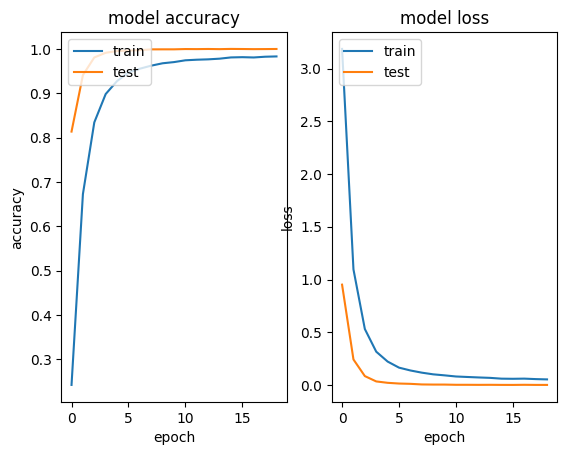

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save the Model 🎁

In [ ]:
model.save('fruits_recognition_cls_141_img_70000_epochs_19.keras')

In [ ]:
!cp /content/fruits_recognition_cls_141_img_70000_epochs_19.keras /content/drive/MyDrive/MODELS/FR360/

In [ ]:
!ls /content/drive/MyDrive/MODELS/FR360/

fruits_recognition_cls_141_img_70000_epochs_19.keras


In [ ]:
img_shape = (W, H, 3)

# Save Clas_names & Image_shape for predict model:
with open(class_name_path, 'w') as f_clss, open(img_shape_path, 'w') as f_shape:

    try:
        f_clss.write(str(class_names))
        f_shape.write(str(img_shape))

        print(f"{class_name_path} & {img_shape_path} Successfuly saved!")

    except:
        print(f"Error in saving {class_name_path} & {img_shape_path}!")

    finally:
        f_clss.close()
        f_shape.close()
